In [4]:
from Bio import SeqIO
import pandas as pd
from collections import Counter
import numpy as np

In [5]:
bam_mappings = pd.read_table('/home/groups/dpwall/briannac/general_data/bam_mappings.csv', index_col=1)
bam_mappings = bam_mappings[bam_mappings.status=='Passed_QC_analysis_ready']
bam_mappings = bam_mappings.drop('09C86428')

# Seeing which k-mers are in T2T assembly.

In [6]:
t2t_kmers = np.load('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/t2t_comparison/t2t_kmers_19.npy', allow_pickle=True).item()

In [7]:
unmapped_seqs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/kmers_unmapped_prev_and_median_filt.txt', 
                 nrows=1000, header=None)[0].values

In [ ]:
seqs_on_chrom = [[] for _ in unmapped_seqs]

for chrom in range(19,23):
    print(chrom)
    t2t_kmers = np.load('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/t2t_comparison/t2t_kmers_%i.npy' % chrom, allow_pickle=True).item()
    for i,s in enumerate(unmapped_seqs):
        complement = s.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').replace(
            'a', 'A').replace('t', 'T').replace('c', 'C').replace('g', 'G')
        for seq_string in [s, s[::-1], complement, complement[::-1]]:
            if seq_string in t2t_kmers: 
                seqs_on_chrom[i] = seqs_on_chrom[i] + [t2t_kmers[seq_string]]

19
20
21
22


In [54]:
seqs_on_chrom

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [19],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [19],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [10]:
# 20% of sequences were found on the chromsome.
np.mean(seqs_on_chrom[localized[localized[2]==20.0].index]==20)

NameError: name 'localized' is not defined

In [342]:
# Percentage of sequences localized correctly according to 
Counter(localized[2][seqs_on_chrom==20.0])[20.0]/sum(Counter(localized[2][seqs_on_chrom==20.0]).values())

0.6991951710261569

In [271]:
males_mean = (unmapped_counts.iloc[list(df[df.chrom_pred==23.0].index)][
    (1+np.where(bam_mappings.sex_numeric=='1.0')[0])]).apply(lambda x: np.mean(x[x>0]),axis=1)

females_mean = (unmapped_counts.iloc[list(df[df.chrom_pred==23.0].index)][
    (1+np.where(bam_mappings.sex_numeric=='2.0')[0])]).apply(lambda x: np.mean(x[x>0]),axis=1)

males_prev = (unmapped_counts.iloc[list(df[df.chrom_pred==23.0].index)][
    (1+np.where(bam_mappings.sex_numeric=='1.0')[0])]>0).mean(axis=1)

females_prev = (unmapped_counts.iloc[list(df[df.chrom_pred==23.0].index)][
    (1+np.where(bam_mappings.sex_numeric=='2.0')[0])]>0).mean(axis=1)

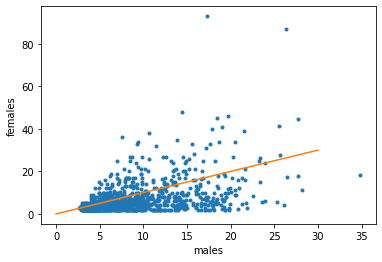

In [272]:
plt.plot(males_mean, females_mean, '.')
plt.xlabel('males')
plt.ylabel('females')
plt.plot([0,30], [0,30])
plt.show()

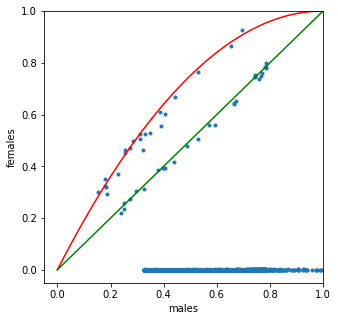

In [274]:
plt.figure(figsize=(5,5))
plt.plot(males_prev, females_prev, '.')
plt.xlabel('males')
plt.ylabel('females')
plt.xlim(-.05,1)
plt.ylim(-.05,1)
mp = np.linspace(0,1, 100)
fp_predicted = (1-(1-mp)*(1-mp))
plt.plot(mp, fp_predicted, 'r-')
plt.plot([0,1], [0,1], 'g-')


In [71]:
for s in unmapped_seqs[:100]:
    complement = s.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').replace(
        'a', 'A').replace('t', 'T').replace('c', 'C').replace('g', 'G')
    print(human_genome.count(s), human_genome.count(complement), 
          human_genome.count(s[::-1]), human_genome.count(complement[::-1]))

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


KeyboardInterrupt: 

In [ ]:
c = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/results/approximate_regions/localized_unmapped.tsv', nrows=10000)
Counter([tuple(a[1]) for a in df[['chrom_pred']].iterrows()]).most_common()

In [ ]:
s = unmapped_seqs[6]
complement = s.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').replace(
        'a', 'A').replace('t', 'T').replace('c', 'C').replace('g', 'G')
#human_genome.count(complement[::-1])
[(r.id, str(r.seq).find(complement[::-1])) for r in records]# for r in records]

In [62]:
np.cumsum([len(r) for r in records])

array([ 248387328,  491084080,  692190028,  885764973, 1067810412,
       1239937040, 1400504468, 1546763799, 1697381046, 1832139180,
       1967266949, 2100591497, 2214158183, 2315319675, 2415072870,
       2511403244, 2595680141, 2676222679, 2737930043, 2804140298,
       2849230980, 2900555906, 3054815472, 3054832041])

In [257]:
np.mean(df.chrom_pred==23.0)

0.1584

NameError: name 'kmers' is not defined